In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

# Define the dataset ZIP file path
ZIP_FILE_PATH = "/content/drive/My Drive/object_recognition/dataset.zip"

# Extract to this location
EXTRACT_PATH = "/content/drive/My Drive/extract"

# Unzipping the dataset
with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print("Dataset extracted successfully!")


Mounted at /content/drive


In [ ]:
DATASET_PATH = "/content/drive/My Drive/extract"  # Update based on extraction folder

ANNOTATION_FILE = f"{DATASET_PATH}/annotations/instances_train2017_subset.json"
IMAGE_FOLDER = f"{DATASET_PATH}/images"


In [ ]:
import os

print("Annotation file exists:", os.path.exists(ANNOTATION_FILE))
print("Image folder exists:", os.path.exists(IMAGE_FOLDER))


Annotation file exists: False
Image folder exists: True


In [ ]:
!pip install opencv-python matplotlib numpy pycocotools


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
DATASET_PATH = "/content/drive/My Drive/extract/coco2017_subset"

# Path to annotation file
ANNOTATION_FILE = f"{DATASET_PATH}/annotation_subset/instances_train2017_subset.json"

# Paths to image folders
TRAIN_IMAGE_FOLDER = f"{DATASET_PATH}/train2017"
VAL_IMAGE_FOLDER = f"{DATASET_PATH}/val2017"
TEST_IMAGE_FOLDER = f"{DATASET_PATH}/test2017"

# Verify paths exist
import os
print("Annotation file exists:", os.path.exists(ANNOTATION_FILE))
print("Train images exist:", os.path.exists(TRAIN_IMAGE_FOLDER))
print("Validation images exist:", os.path.exists(VAL_IMAGE_FOLDER))
print("Test images exist:", os.path.exists(TEST_IMAGE_FOLDER))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Annotation file exists: True
Train images exist: True
Validation images exist: True
Test images exist: True


In [ ]:
from pycocotools.coco import COCO

# Load COCO annotation file
coco = COCO(ANNOTATION_FILE)

# Get all category labels
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

print("COCO Categories:", category_names)


loading annotations into memory...
Done (t=4.48s)
creating index...
index created!
COCO Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

# Function to load and display an image with bounding boxes
def show_random_image():
    # Get a random image ID
    img_ids = coco.getImgIds()
    img_info = coco.loadImgs(random.choice(img_ids))[0]  # Pick a random image

    # Load image
    img_path = f"{TRAIN_IMAGE_FOLDER}/{img_info['file_name']}"  # Correct way
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Could not load image from {img_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Load annotations for this image
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    annotations = coco.loadAnns(ann_ids)

    # Draw bounding boxes
    for ann in annotations:
        x, y, w, h = ann['bbox']
        category = coco.loadCats(ann['category_id'])[0]['name']
        cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 3)
        cv2.putText(img, category, (int(x), int(y)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Show a random image with objects
show_random_image()


In [ ]:
# Count number of images in each dataset
num_train_images = len(os.listdir(TRAIN_IMAGE_FOLDER))
num_val_images = len(os.listdir(VAL_IMAGE_FOLDER))
num_test_images = len(os.listdir(TEST_IMAGE_FOLDER))

print(f"Total Train Images: {num_train_images}")
print(f"Total Validation Images: {num_val_images}")
print(f"Total Test Images: {num_test_images}")


Total Train Images: 29571
Total Validation Images: 1250
Total Test Images: 10168


In [ ]:
# Get all category labels
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

print(f"Total Number of Classes: {len(category_names)}")
print("Classes:", category_names)


Total Number of Classes: 80
Classes: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Load Faster R-CNN model (pre-trained on COCO)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

# Set model to evaluation mode
model.eval()

print("Model Loaded Successfully!")


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 117MB/s]


Model Loaded Successfully!


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

class COCODataset(Dataset):
    def __init__(self, img_folder, annotation_file, transforms=None):
        self.coco = COCO(annotation_file)
        self.img_folder = img_folder
        self.transforms = transforms
        self.img_ids = self.coco.getImgIds()

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        # Load image
        img_info = self.coco.loadImgs(self.img_ids[idx])[0]
        img_path = f"{self.img_folder}/{img_info['file_name']}"
        image = Image.open(img_path).convert("RGB")

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=img_info['id'])
        annotations = self.coco.loadAnns(ann_ids)

        # Extract bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            x, y, w, h = ann['bbox']
            boxes.append([x, y, x+w, y+h])
            labels.append(ann['category_id'])

        # Convert to PyTorch tensors
        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        # Apply transformations (if any)
        if self.transforms:
            image = self.transforms(image)

        return image, target

# Define dataset transformations
transform = transforms.Compose([
    transforms.Resize((416, 416)),
    transforms.ToTensor(),
])

# Load dataset
train_dataset = COCODataset(TRAIN_IMAGE_FOLDER, ANNOTATION_FILE, transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))

print("Custom COCO Dataset Loaded Successfully!")


loading annotations into memory...
Done (t=4.94s)
creating index...
index created!
Custom COCO Dataset Loaded Successfully!


In [ ]:
import torch.optim as optim

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in target.items()} for target in targets]

        # Forward pass
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

print("Training Completed Successfully!")


NameError: name 'torch' is not defined

In [ ]:
class COCODataset(Dataset):
    def __init__(self, img_folder, annotation_file, transforms=None):
        self.coco = COCO(annotation_file)
        self.img_folder = img_folder
        self.transforms = transforms
        self.img_ids = self.coco.getImgIds()

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        # Load image
        img_info = self.coco.loadImgs(self.img_ids[idx])[0]
        img_path = f"{self.img_folder}/{img_info['file_name']}"
        image = Image.open(img_path).convert("RGB")

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=img_info['id'])
        annotations = self.coco.loadAnns(ann_ids)

        # If no annotations, return an empty target
        if len(annotations) == 0:
            return self.__getitem__((idx + 1) % len(self.img_ids))  # Skip image with no annotations

        # Extract bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            if 'bbox' in ann:
                x, y, w, h = ann['bbox']
                boxes.append([x, y, x+w, y+h])
                labels.append(ann['category_id'])

        if len(boxes) == 0:
            return self.__getitem__((idx + 1) % len(self.img_ids))  # Skip if still empty

        # Convert to PyTorch tensors
        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        # Apply transformations (if any)
        if self.transforms:
            image = self.transforms(image)

        return image, target



In [ ]:
import torch.optim as optim

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in target.items()} for target in targets]

        # Forward pass
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

print("Training Completed Successfully!")


AssertionError: Expected target boxes to be a tensor of shape [N, 4], got torch.Size([0]).

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

class COCODataset(Dataset):
    def __init__(self, img_folder, annotation_file, transforms=None):
        self.coco = COCO(annotation_file)
        self.img_folder = img_folder
        self.transforms = transforms
        self.img_ids = self.coco.getImgIds()

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        # Load image
        img_info = self.coco.loadImgs(self.img_ids[idx])[0]
        img_path = f"{self.img_folder}/{img_info['file_name']}"
        image = Image.open(img_path).convert("RGB")

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=img_info['id'])
        annotations = self.coco.loadAnns(ann_ids)

        # Extract bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            x, y, w, h = ann['bbox']
            boxes.append([x, y, x+w, y+h])
            labels.append(ann['category_id'])

        # Convert to PyTorch tensors
        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        # Apply transformations (if any)
        if self.transforms:
            image = self.transforms(image)

        return image, target

# Define dataset transformations
transform = transforms.Compose([
    transforms.Resize((416, 416)),
    transforms.ToTensor(),
])

# Load dataset
train_dataset = COCODataset(TRAIN_IMAGE_FOLDER, ANNOTATION_FILE, transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))

print("Custom COCO Dataset Loaded Successfully!")


loading annotations into memory...
Done (t=6.09s)
creating index...
index created!
Custom COCO Dataset Loaded Successfully!


In [ ]:
import torch.optim as optim

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in target.items()} for target in targets]

        # Forward pass
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

print("Training Completed Successfully!")


AssertionError: Expected target boxes to be a tensor of shape [N, 4], got torch.Size([0]).

In [ ]:
class COCODataset(Dataset):
    def __init__(self, img_folder, annotation_file, transforms=None):
        self.coco = COCO(annotation_file)
        self.img_folder = img_folder
        self.transforms = transforms
        self.img_ids = self.coco.getImgIds()

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_info = self.coco.loadImgs(self.img_ids[idx])[0]
        img_path = f"{self.img_folder}/{img_info['file_name']}"
        image = Image.open(img_path).convert("RGB")

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=img_info['id'])
        annotations = self.coco.loadAnns(ann_ids)

        # ❗ Check if the image has no annotations
        if len(annotations) == 0:
            return self.__getitem__((idx + 1) % len(self.img_ids))  # Skip image and pick another

        # Extract bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            if 'bbox' in ann:
                x, y, w, h = ann['bbox']
                if w > 0 and h > 0:  # Ensure bounding box is valid
                    boxes.append([x, y, x + w, y + h])
                    labels.append(ann['category_id'])

        if len(boxes) == 0:
            return self.__getitem__((idx + 1) % len(self.img_ids))  # Skip image if still empty

        # Convert to PyTorch tensors
        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        if self.transforms:
            image = self.transforms(image)

        return image, target


In [ ]:
count_no_annotations = 0

for img_id in train_dataset.img_ids:
    ann_ids = train_dataset.coco.getAnnIds(imgIds=img_id)
    if len(ann_ids) == 0:
        count_no_annotations += 1

print(f"🛑 Images with no annotations: {count_no_annotations}")


🛑 Images with no annotations: 256


In [ ]:
class COCODataset(Dataset):
    def __init__(self, img_folder, annotation_file, transforms=None):
        self.coco = COCO(annotation_file)
        self.img_folder = img_folder
        self.transforms = transforms
        self.img_ids = self.coco.getImgIds()

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_info = self.coco.loadImgs(self.img_ids[idx])[0]
        img_path = f"{self.img_folder}/{img_info['file_name']}"
        image = Image.open(img_path).convert("RGB")

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=img_info['id'])
        annotations = self.coco.loadAnns(ann_ids)

        # ❗ Check if the image has no annotations
        if len(annotations) == 0:
            return self.__getitem__((idx + 1) % len(self.img_ids))  # Skip image and pick another

        # Extract bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            if 'bbox' in ann:
                x, y, w, h = ann['bbox']
                if w > 0 and h > 0:  # Ensure bounding box is valid
                    boxes.append([x, y, x + w, y + h])
                    labels.append(ann['category_id'])

        if len(boxes) == 0:
            return self.__getitem__((idx + 1) % len(self.img_ids))  # Skip image if still empty

        # Convert to PyTorch tensors
        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        if self.transforms:
            image = self.transforms(image)

        return image, target


In [ ]:
!ls -R /content/object_recognition_dataset/


ls: cannot access '/content/object_recognition_dataset/': No such file or directory


In [ ]:
!find /content/drive/MyDrive/ -type d -name "*object*"


find: ‘/content/drive/MyDrive/’: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


'Colab Notebooks'   extract   object_recognition


In [ ]:
!ls -R /content/drive/MyDrive/object_recognition/


Streaming output truncated to the last 5000 lines.
000000022724.jpg  000000138151.jpg  000000257066.jpg  000000373895.jpg	000000489186.jpg
000000022747.jpg  000000138155.jpg  000000257137.jpg  000000373898.jpg	000000489199.jpg
000000022777.jpg  000000138166.jpg  000000257162.jpg  000000373904.jpg	000000489203.jpg
000000022793.jpg  000000138186.jpg  000000257163.jpg  000000373905.jpg	000000489257.jpg
000000022797.jpg  000000138189.jpg  000000257167.jpg  000000373936.jpg	000000489264.jpg
000000022806.jpg  000000138195.jpg  000000257190.jpg  000000373988.jpg	000000489266.jpg
000000022811.jpg  000000138196.jpg  000000257198.jpg  000000374018.jpg	000000489276.jpg
000000022816.jpg  000000138220.jpg  000000257211.jpg  000000374023.jpg	000000489288.jpg
000000022834.jpg  000000138246.jpg  000000257215.jpg  000000374028.jpg	000000489358.jpg
000000022871.jpg  000000138303.jpg  000000257231.jpg  000000374033.jpg	000000489414.jpg
000000022874.jpg  000000138317.jpg  000000257243.jpg  000000374043.jp

In [ ]:
ANNOTATION_FILE = "/content/drive/MyDrive/object_recognition/extract/annotations/instances_train2017_subset.json"
TRAIN_IMAGE_FOLDER = "/content/drive/MyDrive/object_recognition/extract/coco2017_subset/train2017"
VAL_IMAGE_FOLDER = "/content/drive/MyDrive/object_recognition/extract/coco2017_subset/val2017"
TEST_IMAGE_FOLDER = "/content/drive/MyDrive/object_recognition/extract/coco2017_subset/test2017"


In [ ]:
import os

print("Annotations file exists:", os.path.exists(ANNOTATION_FILE))
print("Train images folder exists:", os.path.exists(TRAIN_IMAGE_FOLDER))
print("Validation images folder exists:", os.path.exists(VAL_IMAGE_FOLDER))
print("Test images folder exists:", os.path.exists(TEST_IMAGE_FOLDER))


Annotations file exists: True
Train images folder exists: True
Validation images folder exists: True
Test images folder exists: True


In [ ]:
from pycocotools.coco import COCO

coco = COCO(ANNOTATION_FILE)
print("COCO dataset loaded successfully!")


loading annotations into memory...
Done (t=8.43s)
creating index...
index created!
COCO dataset loaded successfully!


loading annotations into memory...
Done (t=4.85s)
creating index...
index created!


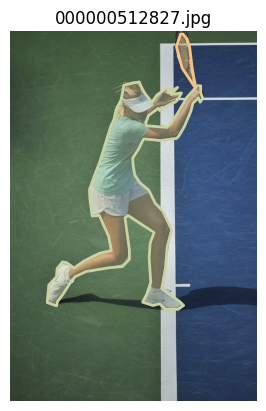

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Load COCO annotations
ANNOTATION_FILE = "/content/drive/MyDrive/object_recognition/extract/annotations/instances_train2017_subset.json"
IMAGE_FOLDER = "/content/drive/MyDrive/object_recognition/extract/coco2017_subset/train2017"

coco = COCO(ANNOTATION_FILE)

# Function to display image with annotations
def show_image_with_annotations(image_folder, coco):
    img_ids = coco.getImgIds()
    img_info = coco.loadImgs(random.choice(img_ids))[0]
    img_path = os.path.join(image_folder, img_info['file_name'])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load annotations
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    plt.imshow(img)
    coco.showAnns(anns)
    plt.axis("off")
    plt.title(img_info['file_name'])
    plt.show()

# Display a random image with annotations
show_image_with_annotations(IMAGE_FOLDER, coco)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pycocotools.coco import COCO

# Set dataset path
annotations_path = "/content/drive/MyDrive/object_recognition/extract/annotations/instances_train2017_subset.json"

# Load COCO dataset
coco = COCO(annotations_path)


loading annotations into memory...
Done (t=7.85s)
creating index...
index created!


In [4]:
# Number of images
num_images = len(coco.imgs)
# Number of categories
num_categories = len(coco.cats)
# Number of annotations
num_annotations = len(coco.anns)

print(f"Total Images: {num_images}")
print(f"Total Categories: {num_categories}")
print(f"Total Annotations: {num_annotations}")


Total Images: 29571
Total Categories: 80
Total Annotations: 212806


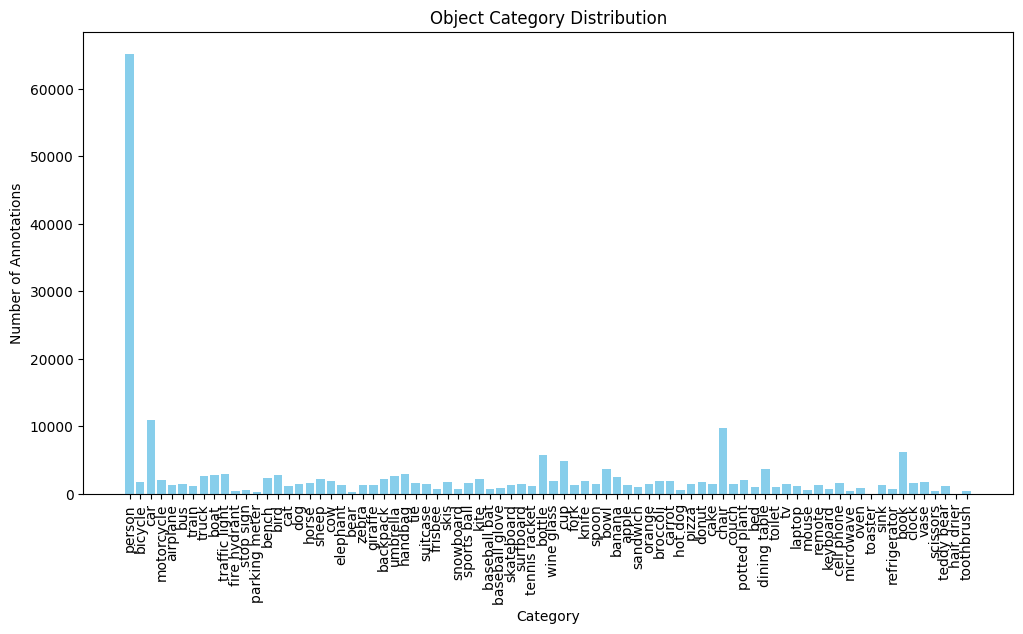

In [5]:
# Get all categories
categories = coco.cats
category_counts = {}

for cat_id, cat_info in categories.items():
    category_counts[cat_info['name']] = len(coco.getAnnIds(catIds=[cat_id]))

# Plot category distribution
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Annotations")
plt.title("Object Category Distribution")
plt.show()


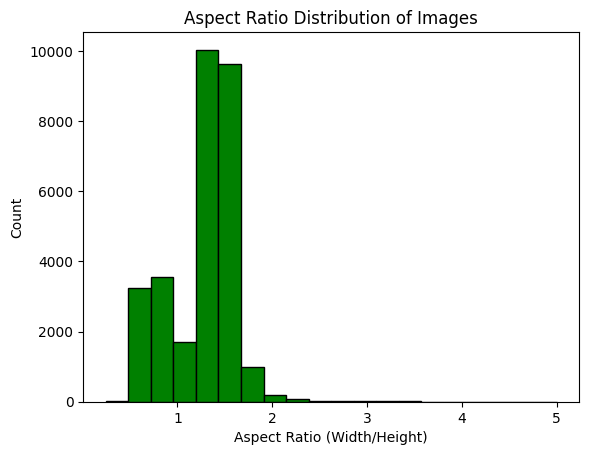

In [6]:
image_sizes = []
aspect_ratios = []

for img_id, img_info in coco.imgs.items():
    width, height = img_info['width'], img_info['height']
    image_sizes.append((width, height))
    aspect_ratios.append(width / height)

# Plot aspect ratio distribution
plt.hist(aspect_ratios, bins=20, color='green', edgecolor='black')
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Count")
plt.title("Aspect Ratio Distribution of Images")
plt.show()


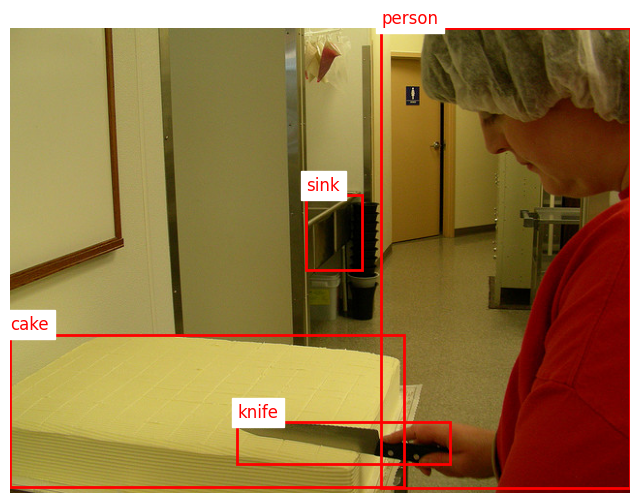

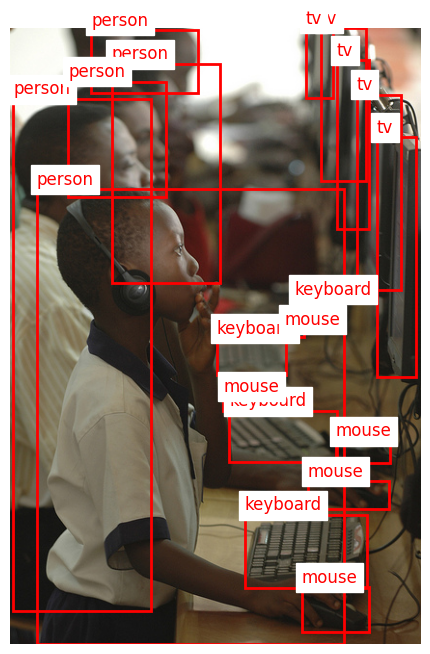

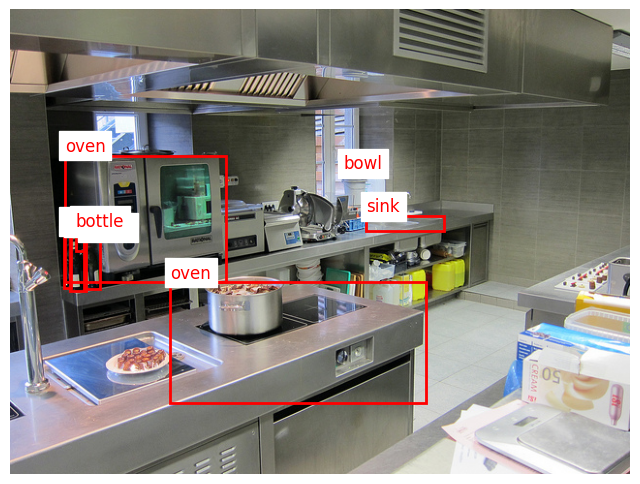

In [7]:
def show_image_with_annotations(image_id):
    image_info = coco.loadImgs(image_id)[0]
    image_path = f"/content/drive/MyDrive/object_recognition/extract/coco2017_subset/train2017/{image_info['file_name']}"

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)

    # Load annotations
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = bbox
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2))
        category = coco.cats[ann['category_id']]['name']
        plt.text(x, y - 5, category, color='red', fontsize=12, backgroundcolor="white")

    plt.axis("off")
    plt.show()

# Show 3 sample images
sample_image_ids = list(coco.imgs.keys())[:3]
for img_id in sample_image_ids:
    show_image_with_annotations(img_id)
